Programa para hacer upsampling de una serie de datos no equidistantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datafile = 'rp_G4016-01_termopar.csv' # Archivo a Interpolar
df = pd.read_csv('./RP/' + datafile)                 # Directorio
df.shape

(8167, 2)

df1 = df[:len(df)//2]
df2 = df[len(df)//2:]
df = df2

df = df2
indice = np.argmax(df["data"])
print(df["data"][indice])
del df["data"][indice]
indice = np.argmax(df["data"])
print(df["data"][indice])

In [3]:
df.columns = ['timestamps','values']
timestamps = pd.to_datetime(df['timestamps'].values)
values = df['values'].values

#------ Tambien puedes interpolar valores en especifico------#
#values = [722.46,5]
#timestamps = pd.to_datetime(['4/22/2018 4:00:02','4/22/2018 14:00:00'])

In [4]:
ts = pd.Series(values, index=timestamps)

In [5]:
ts = ts[~ts.index.duplicated()]
ts[ts==-1] = np.nan

In [6]:
newFreq=ts.resample('2S').asfreq()

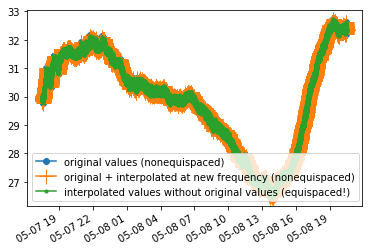

In [7]:
new = (ts.reindex(ts.index | newFreq.index)
           .interpolate(method='time')
           .loc[newFreq.index])

ts.plot(marker='o')
new.plot(marker='+',markersize=15)

new[newFreq.index].plot(marker='.')

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['original values (nonequispaced)', 'original + interpolated at new frequency (nonequispaced)', 'interpolated values without original values (equispaced!)']
plt.legend(lines, labels, loc='best')
plt.show()

In [8]:
# Se guarda el nuevo archivo
interpol = 'interpolated_2s_' + datafile
new.to_csv('./RP/' + interpol)
new.shape

(48599,)

In [9]:
# Smoothing this shit with Dr. P-pillo code
import scipy.signal as signal

In [10]:
data_to_smooth = new[1:]
new = new[1:]
data_to_smooth.shape

(48598,)

In [11]:
data_cp = new.copy()

In [12]:
# apply low-pass filter
smooth_plots = []
# First, design the Buterworth filter
order  = 2   # Filter order
Wn = 0.05 # Cutoff frequency
B, A = signal.butter(order, Wn, output='ba')
smooth_plots = signal.filtfilt(B, A, data_to_smooth)
#smooth_plots = a_valores.apply(lambda row: signal.filtfilt(B, A, row))

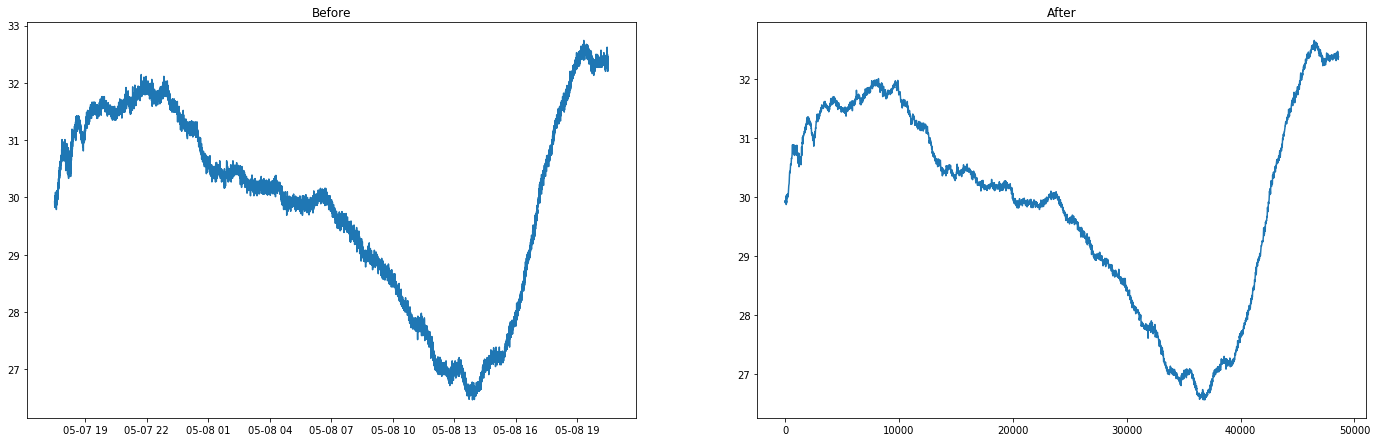

In [13]:
# plot current state vs result
fig = plt.figure(figsize=(24, 16))

ax1 = fig.add_subplot(221)
ax1.set_title("Before")
ax1.plot(data_to_smooth)

ax2 = fig.add_subplot(222)
ax2.set_title("After")
ax2.plot(smooth_plots)

plt.show()

In [14]:
data_cp[0:] = smooth_plots
if (data_cp == new).all(): #son iguales! D:
    raise "No se hizo bien el smooth"

In [15]:
# Se guarda el nuevo archivo
smooth = 'smoothed_2s_' + datafile
data_cp.to_csv('./RP/' + smooth)

In [16]:
df = pd.read_csv('./RP/' + smooth)     # Directorio
df.columns = ['timestamps','values']
timestamps = pd.to_datetime(df['timestamps'].values)
values = df['values'].values
ts = pd.Series(values, index=timestamps)
ts = ts[~ts.index.duplicated()]
ts[ts==-1] = np.nan

In [17]:
newFreq=ts.resample('300S').asfreq()

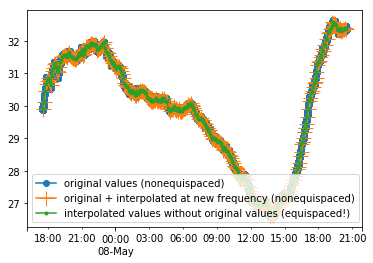

In [18]:
new = (ts.reindex(ts.index | newFreq.index)
           .interpolate(method='time')
           .loc[newFreq.index])

ts.plot(marker='o')
new.plot(marker='+',markersize=15)

new[newFreq.index].plot(marker='.')

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['original values (nonequispaced)', 'original + interpolated at new frequency (nonequispaced)', 'interpolated values without original values (equispaced!)']
plt.legend(lines, labels, loc='best')
plt.show()

In [19]:
# Se guarda el nuevo archivo
last = 'interpolated_5min_' + datafile
new.to_csv('./RP/' + last)